# 10 Feature Engineering 

# 3- Encoding Scaling

## 1- Encoding

encod etmek ne demektir ? değişkenlerin temsil şekillerinin değiştirilmesidir.
birkaç yöntemi vardır.

1- label encoding
(label ne demek? örneğin bir kategorik değişkenin sınıfları labellardır. örn sex, female, male gibi. buradaki labelları encod etmek demek yeniden kodlamak demektir. bunları encod ettiğimizde nasıl bir hal almasını bekliyoruz? örneğin daha önce string şekilde temsil edilen bu yerleri 0 ve 1 ile ifade ediyoruz artık. ya da 0 1 2 3 4 5 şeklinde temsil edebilir buna elimizdeki modelin anlayabileceği şekilde dönüşüm yaparak karar veriyoruz. iki sınıflı bir string değeri 0 ve 1 şeklinde temsil etmemiz gerekmektedir. )



* farklı senaryoları inceleyelim 
örn elimizde şu anda eğitim ile ilgili bir değişken var ve bu eğitim durumu değişkenine label encoding işlemi uygulanıyor. yani burada eğitim durumları var 0 en düşük eğitim durumunu temsil ediyor 5 ile phd yani en yüksek eğitim durumunu temsil ediyor. yani elimde bir kategorik bir değişken vardı ve elimdeki bu kategorik değişken ordinal(sıralı) bir kategorik değişken yani sınıflar arasında bir fark var, büyük olan sınıf ve küçük olan sınıf var, 

* şimdi soruda sıra? ben bu kategorik değişkene label encoding işlemi uygulayabilir miyim evetse neden hayırsa neden?

sorunun cevabı evet dönüştürebiliriz sorunun yanıtı neden evet çünkü, buradaki education değişkeni sıralıdır(ordinaldir) ve bu ordinal değişkenin sınıfları arasında fark vardır. bu değişkenin sayısal olarak temsil edildiği durumda da bu farklar taşınmaktadır. 0 burada küçük sınıfı 5 burada büyük sınıfı temsil etmektedir. dolayısıyla education değişkeni label encoderdan bu şekilde geçirilebilir. (diğer bir yanıt ise evet geçirilebilir ama one hot encoderdan da geçirilebilir olabilirdi.)

* şimdi  farklı bir soru ele alalım :
elimde futbol takımlarından oluşan bir değişken bulunmaktadır. örn gs, fb, bjk, ts, bc, rm gibi. ben bu değişkeni label encoderdan geçirdim diyelim ve takımlara sırası ile 0dan 5e kadar sayılar atandı. ben bu değişkene label encoder işlemi uygulayabilir miyim? 

dikkat ben bu değişkeni böyle bırakacaksam bu işlemi yapmamam lazım. çünkü benim burada atadığım sayıları kullanacağımız modeller büyüklük olarak algılayacaktır. ancak değişkenler arasında büyüklükle ilgili bir derecelendirme bir önceki örnekteki gibi bulunmamaktadır. takımlar arasında herhangi bir fark bulunmamaktadır. bu değişkenler arasında bir ordinallik olmadığından label encoderdan böyle nominal bir değişkeni geçirmek bir miktar sakıncalı olacaktır. çünkü büyüklük küçüklük durumu normalde olmadığı halde değerleri bu şekide encoder ettim. sanki ilk takımın değeri kçük son takımın değeri büyükmüş gibi oldu. bundan dolayı label encoder böylr kullanılmamalıdır. 

peki böyle bir değişken nasıl encoding edilmelidir. böyle bir değişken one hot encoderdan geçirilebilir. one hot encoding işlemi buradaki her bir sütunu farklı bir sütuna, değişkene dönüştürecektir.

## 2- Label Encoding

###### label encoding karşımıza binary encoding olarak da gelebilir.

eğer bir değişkenin iki sınıfı var ve 1 ve 0 ile kodlanırsa buna binary encoding denir. eğer daha fazla değişkeni varsa ve bu şekilde kodlanırsa buna label encoding denmektedir. yani normalde label > binarydir ancak genel ismi label encodingtir.

In [1]:
# şimdi label encoder işlemlerini uygulayalım titanic veri seti üzerinde

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor #çok değişkenli ayıklama yöntemi bunkarı gptye sor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler #standartlaştırma ve dönüştürme fonksiyonları


df = pd.read_csv("titanic.csv")
df.head()

Defaulting to user installation because normal site-packages is not writeable


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df["Sex"].head()
#yapmak istediğim şey buradaki male, female değerlerini binary şekilde etmek. yani label encoderdan geçirmek

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

###### neden bunu yapıyorum?

öncelikle nedenini iyi kavramak lazım. bunu yapmamın sebebi makine öğrenmesi algoritmalarının beklediği bir standart veri vardır. bu standartlara uydurmama gerekiyor işlem yapacağım datayı. bunun istisnaları olsa da genelde eldeki veri label encoder veya one hot encoder işlemlerinden geçirilir. ancak tek sebebi bu değil bazen de elimizdeki kategorik değişkenin sınıflarına değer atfetmek durumunda kalabiliriz yani sınıflar ordinalse bunlara uygun değerler vermemiz gerekebilir. yani model performansı gelişmiş olacaktır

In [3]:
le = LabelEncoder() #label encoder nesnemi getiriyorum. bu nesneye fit_tranform metodunu kullanarak cinsiyet değişkenlerini uygulamamız lazım.
le.fit_transform(df["Sex"])[0:5] # yani önce bu label encoder nesnesini bu değişkene fit et yani encoderı uygula sonra değerlerini trnasform ile dönüştür. 
#fit_trnasform iki basamaklı bir işlem birinci basamakta ilgili dönüştürme işlemi işlemi yapılır, sonra elimde eski ve yeni hali bulunur ve eski hali yerine yeni hali yazılır.

array([1, 0, 0, 0, 1])

dönüştürme işlemi neye göre oluyor, alfabetik sırayla oluyor ilk gördüğü değere 0 değerini sonraki değere 1 değerini veriyor. dolayısıyla burada 5 sınıf olsaydı alfabetik sıraya göre 0 1 2 3 4 değerleri verilmiş olacaktı.

In [4]:
#diyelimki hangisine 1 hangisine 0 verdiğimizi unuttuk bunu nasıl öğerenebiliriz?
# inverse_transform adından bir metodumuz var bu metod sayesinde 

le.inverse_transform([0,1]) # dönüştürm bilgileri daha önceki işlemde le nesnesinin içinde tutuluyor.
# dolayısıyla içerisine de değerlerimi girdiğimde bana değerlerin karşılıklarını vermiş olacak.
# burada 0 female 1 maledir.

array(['female', 'male'], dtype=object)

In [5]:
# bunu kendi ihtiyaçlarıma göre şekillendirmek istediğimden dolayı fonksiyon yazıyorum

def label_encoder(dataframe, binary_col): # 1. argüman dataframe 2. argüman binary bir değişken yani iki sınıflı bir değişken giriyorum
    labelencoder = LabelEncoder() # label encoderı burada bir çağırma işlemini yapıyorum
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col]) #burada da fit transform işlemini yapıyorum
    return dataframe #dataframei return ediyorum

elimde yeni bir problem var birkaç değişken olduğunda bunu elimle seçebiliyorum ancak yüzlerce değişken olduğunda bunu nasıl seçeceğim sonuçta amacım bunu ölçeklenebilir yapmak. bu durumda binary kolonları seçmem gerekmektedir. iki seçeneğim vardı birinci olarak yukarıdaki işlemi yapabilirim. ikinci olarak one hot encoderı uygulayabilirim. one hot encoderı uygularken get_dummies metodunu kullanırız bu metodu kullanırken drop firstü eğer true yaparsak bu durumda iki sınıflı kategorik değişkenler de aslında label encoderdan geçirilmiş olur.

In [6]:
# iki sınıflı kategorik değişkenleri seçmem gerekmektedir bunun için: 

binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"] #sadece int yazınca düzgün çalışmadı
               and df[col].nunique() == 2] #neden uniq değil de nuniq kullandım uniq kullandığımda eksik değerleri de farklı bir sınıf olarak görecek bu yüzden problem olacaktı o yüzden nunique kullandım, len(unique()) kullanmadım eksik değer varsa 3 çıkacaktı, bu sebeple number uniq sayısı mı 2 olsun dedim. çünkü numer unique metodu eksik değeri bir sınıf olarak görmez.
#değişkenin sütunlarında gez dedim. gezmiş olduğun değişkenin tipine bak, int ve float olmasın eğer int float olmayan bir kolon bulursan uniq değeri 2ye eşit olsun yani farklı olarak 2 değer barındırsın ve bu kolonu seç diyorum.
#zaten eğer int bir değerin 2 uniq değeri varsa o binary encod edilmiştir.

binary_cols

['Sex']

In [7]:
for col in binary_cols: #binary collarda gez
    label_encoder(df, col) # kolonlarda encoding işlemi yap, yeniden ataam işlemi yapmama gerek yok çünkü yazdığım fonksiyonda atama işlemi kalıcı şekild eyapılıyor fit_transform metodu ile

In [8]:
df.head() # artık cinsiyet değişkeni 1 ve 0 lardan oluşuyor artık encod edildi.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#daha büyük bir veri seti okutarak deneyeceğim.

df = pd.read_csv("application_train.csv")
df.shape 
#122 değişkenden binary kolonları seçmem lazım
# bu kadar değişkeni teker teker veya headini inceleyip karar veremeyeceğimden programatik şekilde yapmam lazım

(307511, 122)

In [10]:
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"] #sadece int yazınca düzgün çalışmadı
               and df[col].nunique() == 2]
binary_cols # binary_cols'u tekrar çağırıyorum bakalım bu 122 değişkenden kaç tanesi 2 uniq değerliymiş
# 4 farklı değişkenin verilerinde 2 tane uniq değer varmış

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [11]:
# bu değişkenleri veri setinden seçmek için df içine binary_col yazmam yeterli 

df[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,N,Y,No
1,Cash loans,N,N,No
2,Revolving loans,Y,Y,NaN
3,Cash loans,N,Y,NaN
4,Cash loans,N,Y,NaN


In [12]:
#şimdi label encoderdan bu binary colları geçiriyorum

for col in binary_cols:
    label_encoder(df, col)
# işlem aslın da başarılı kolonlar label encoder oldu ancak 
#EMERGENCYSTATE_MODE kolonundaki eksik değerler de doldurulmuş. normalde 0 ve 1ler var ancak 2 değeri de boş değerleri doldurmuş şekilde gözüküyor.
#uçtan uca ele aldığım uygulamada bu problemi ele alacağım bir diğer yöntem de bu şekilde doldurulması tercih edilen yaygın bir seçenektir.
#sadece şunu bilmek lazım ben burada eksik değerler için 2 değerini verdim. ya da eksik değere sahip gözlemleri silmek lazım.ya da başka şekilde eksik değerlere işlem yapmak lazım. 
#özetle eksik değerlerin farkında olmak lazım.

In [13]:
df[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0,0,1,0
1,0,0,0,0
2,1,1,1,2
3,0,0,1,2
4,0,0,1,2


## 3- One Hot Encoding


daha önceki problemim neydi? futbol takımları arasınad fark olmamasına rağmen bunların arasında fark varmış gibi bir encod etme durumu vardı. bundan dolayı bunu böyle encod etmek doğru olmayacaktır. bunun etkisi de doğrusal yöntemlerde kendini daha ciddi hissettirirken ağaç yöntemlerinde sıralama ve dallanma olduğundan orada bir etkisi olmayabilir yorumu yapabiliriz.

bu takımların olduğu değişkeni yani aralarında erdinal şekilde fark olmayan değişkeni doğru şekilde encod etmenin yolu one hot encodingtir. yani buradaki sınıfları değişikenin içindeki verilerin her birini ayrı bir kolona, deişkene dönüştürüyorum ve ilgili satırında 1 diğer diğer satırlarında 0 yazıyor. yani kolon ve satırında örn fbler çakıştığında 1 diğer satır ve sütunlarında 0 yazacak.

burada bir dummies değişken tuzağ vardır drop first diyerek bu tuzaktan kurtulmuş oluyorum. dummies, kukla değişken tuzağı ne demek? 
burada oluşturmuş olduğumuz değişkenlere dummie(kukla) değişken denir. eğer bu kukla değişkenler birbiri üzerinden oluşturulabilir olursa bu durumda ortaya bir ölçme problemi çıkmaktadır. yani birbiri üzerinden oluşturulan değişkenler yüksek korelasyona sebep olacaktır. bundan dolayı dummies değişken oluşturulurken ilk sınıf drop edilir ve birbiri üzerinde oluşturulma durumu ortadan kaldırılmaya çalışılır. önemli bir noktadır.

## 4- One Hot Encoding


In [14]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df["Embarked"].value_counts() #embarked değşikeninin 3 tane sınıfı var.
#bu sınıflar arasında bir fark yok yani nominal şekilde ölçülmüş kategorik bir değişkendir
#bu değişkeni label encodinge sokmak ortaya problem çıkaracağından dolayı one hot encod edeceğiz.

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
#bunun için pandasın get dummies metodu kullanılır

pd.get_dummies(df, columns = ["Embarked"]).head() #bana bir dataframe söyle dfde dönüştürmek istediğin sütunların adını söyle der ve bunları dömüştürüp yeni bir kolon olarak ekler.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


In [17]:
#şimdi de kukla değişken tuzağına düşmemek için yani değişkeneler kendi üüzerlerinden üreyemesin diye drop first argümanıın yapacağız.

pd.get_dummies(df, columns = ["Embarked"], drop_first = True).head() #ilk sınıf silindi alfabetik sıraya gör seçti sileceğini.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,True


In [18]:
#eğer ilgili değişkende eksik değerler de bir sınıf olarak gelsin isterseniz dummy_na argümanını True yapmalısınız

pd.get_dummies(df, columns = ["Embarked"], dummy_na = True).head()
#önceki örneklerde görüldüğü gibi bazen eksiklikler de bir şey ifade ediyor olabiliyor bu yüzden eksiklikleri kolon haline getirmek istersek, bir sınıf gibi değerlendirmek istersek one hot encoding yapmamız gerekmektedir.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True,False


eğer ben columns kısmına diğer encod etmek istediğim kolonları da yazarsam onlar da hem one hot edilmiş olur hem de binary encod edilmiş olur böylece ikisi de aynı anda yapılmış olur ve drop first argümanım yine true olmalı.

In [19]:
#gösterilme şekli (burada değiken 2 sınıflı olmalı sadece yani işe yaraması için binary olmalı)
#zaten dropfirst true dediğimde d e2 sınıftan biri düşeceği için binary encod edilmiş oluyor
pd.get_dummies(df, columns = ["Sex", "Embarked"], drop_first= True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [20]:
def grab_col_names(dataframe, cat_th=10, car_th=20, print_results=True):



    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    cat_cols = cat_cols + num_but_cat
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    if print_results:
        print(f'Observations {dataframe.shape[0]}')
        print(f'Variables:  {dataframe.shape[1]}')
        print(f'cat_cols:  {len(cat_cols)}')
        print(f'num_cols:  {len(num_cols)}')
        print(f'cat_but_car:  {len(cat_but_car)}')
        print(f'num_but_cat:  {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations 891
Variables:  12
cat_cols:  6
num_cols:  3
cat_but_car:  3
num_but_cat:  4


In [21]:
#bunu programatik olarak nasıl yapacağım

def one_hot_encoder(dataframe, categorical_cols, drop_first = True):
    dataframe = pd.get_dummies(dataframe, columns = categorical_cols, drop_first = drop_first)
    return dataframe

In [22]:
df = pd.read_csv("titanic.csv")

In [23]:
#cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [24]:
"""elimde kategorik değişkenler var bunların hepsini one hot edebilirim ve drop first yapmam durumunda cinsiyet değişkeni 
gibi bazı değişkenler label encod edilmiş olacak kolonlar üzerinden yorum yapıyorum."""

'elimde kategorik değişkenler var bunların hepsini one hot edebilirim ve drop first yapmam durumunda cinsiyet değişkeni \ngibi bazı değişkenler label encod edilmiş olacak kolonlar üzerinden yorum yapıyorum.'

In [25]:
#on hot encoddan geçecek sütunları kendim takip edebilirim bu sağlıklı bir yöntem

In [26]:
#çok daha büyük değişkenle çalıştığımda problem olacağı için şöyle yapıyorum

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
#df sütunlarında gez eğer ilgili değişkenin eşsiz sütun sayısı 10dan küçük ve 2dn büyük ise bunları seç
ohe_cols #cinsiyet ve surviveddan kurtuldum sur zaten bağımlı değişkenim cinsiyet de daha öncesinde yapmıştım.

['Pclass', 'SibSp', 'Parch', 'Embarked']

In [27]:
# şimdi bunları one hot encoddan geçiriyorum
one_hot_encoder(df, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,False,True,...,False,False,False,False,False,False,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,False,True,...,False,False,False,False,False,False,False,False,False,True


In [28]:
# en sonunda hepsini birlikte kullanacağım.

## 5- Rare Encoding


rare nadir demek. diyelimki elimizde şehirlerden oluşan bir kategorik değişken var ve yan kolonunda frekanslarının verildiği city_count kolonu var bu şehirlerin frekansları karmaşık şekild everilmiş ve bazı değerler çok düşük bu düşük değerlere işlem yapmam lazım. genellikle işlemlerimde karmaşıklık ile değil basitlik ve genellenebilirlik ile ilgileniyor olurum. genellemekten ksaıt herkesi kapsamak değil büyük çoğunluğu temsil etmektir.

örneğin bir model kuracağız ve bu model eçeşitli istemleri entegre ediyor olacağız, örn ev fiyat tahmini araç fiyat tahmini ya da buna benzer bir iş dalında problemi çözecek olan bir makine öğrenmesi modeli olsun. elimde yüz binlerce değişken varken ve elimde sadece 2 kere gözlemlenmiş frekansı iki olan bir d verim var. bunu ohe ettiğimde bu da bir değişkene dönüşmüş olacak ve bu verinin sadece 2 hücresinde 1 diğer yüz binlerce hücresinde 0 yazacak. bu durumda bu bir bilgi taşıyor ve ayırt edicilik taşıyor diyemeyiz. çok az sayıda gözleme sahip. sonuçta ohe ettiğimde yeni değişkenler oluşturmuş olacağım ve onların da belirli bir kalitede olmasını istiyorum. ve gereksiz bir çok değişken oluşturmak istemiyorum aynı zamanda. çünkü hem iterasyon süreçlerini he moptimizasyon süreçlerini hem de ağa. yöntemlerindeki bölünme süreçlerini çok ciddi şekilde etkiliyor olacak. bu durumda gereksiz değişkenlerden kurtulma çabam var. bu durumda rare encoderı kullanabilirim. 

diyelimki bir eşik değer belirleyelim örneğin 25in altında olan değerleri istemiyorum bunları tek tek ifade etmek yerine bir araya getirip ifade etmek istiyorum. 25ten büyük olan sınıfları bir araya getiriyorum. diğerlerini de çıkarıp bir sınıf içinde bir araya getiriyorum ve buna da rare diyorum.

yani rare encoding belirli bir eşik değerinin altında ya da oranın altında olan sınıfları birleştirip bir yerde toplamaya denmektedir.

## 6- Rare Encoding Uygulama


ekstra bir içerik olarak düşünülmeli bonus olarak eriliyor rare encoding orta ileri seviye bir metoddur. 
bu bölüm üç adımda incelenecektir.

1- kategorik değişkenlerin azlık çokluk durumlarının analiz edilmesi
2- rare(nadir) kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi (belki aralarında bir ililşki vardır)
3- rare encoder yazacağız.



In [29]:
df = pd.read_csv("application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df["NAME_EDUCATION_TYPE"].value_counts() #kolona value count attım.

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [31]:
#burada görüldüğü üzere acadeic degree dışındaki sınıfların frekansları iyiyken
#academic degreenin frekansı diğerlerine göre çok az kalıyor.
#az olan biredn fazla sınıfı bir aray getirmekle ilgileniyor olacağız.

In [32]:
#bu dfnin içinde kaç tane kategorik değişken var bilmediğim için buna erişmem lazım
#problemim kategorik değişkenleri seçmek ancak nasıl seçeceğim.grab_col_names fonksiyonu ile

In [33]:
cat_cols, num_cols, cat_but_car = grab_col_names(df) #cat_colsları hesaplatıyorum

Observations 307511
Variables:  122
cat_cols:  54
num_cols:  67
cat_but_car:  1
num_but_cat:  39


In [34]:
cat_cols #fonksiyonumun veridği categorik değişkenler

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOC

burada yeni bir fonksiyona ihtiyacım var, burada öyle bir fonksiyon yazmam gerekiyor ki bana bu kategorik değişkenlerin ban sınıfını ve sınıfların oranlarını getirmeli

In [35]:
def cat_summary(dataframe, col_name, plot = False): #1. argüman dataframe, ikincisi col_name, üçüncüsü ise plot, countplot ile görselleştirmek istiyorsak buna true diyeceğiz.
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), #bir dataframe oluşturuldu print edildi ve bir sözlük yapısı içerisinde ilgili değişkenin isimleri ve sınıf dağılımı(value_countu) istendi
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})) #ve sınıflarının oranları
    print("#########################################")
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show()

In [36]:
for col in cat_cols:
    cat_summary(df, col) #bu şekilde tüm kategorik değişkenler geldi
# kategorik değişkenlerin sınıf bilgileri geldi.
#ilk kısımda code_gender diye bir sınıf var burada oranları ve frekansları var 
# burada xna sınıfı direkt çöp diyebiliriz silinmesi gerekiyor diyebiliriz çünkü bu sınıf bilgi taşımamaktadır. sadece 0.001 oranı vardır. 
# aynı zamanda 0.001 bir değişkene dönüştürüldüğünde kullanılma oranıdır.


"""name_income_type değişkenindeki unemployedtan maternity leave sınıfına kadar olan
sınıflar da çok düşüktür bu sınıfları birleştirip rare encod yapabiliriz.

bu veri setinde yüzlerce farklı sınıfı var ve ben bunu bu şekilde eho ettiğimde yüzlerce farklı 
yeni değişken oluşmuş olacak dolayısıyla buna gerek yoktur veriyi şişirmekten başka bir işe yaramayacak.
bazı filtre işlemleri yapmak istiyorum. bazı sınıflar tamamen gereksiz bazı sınıfların bazıları gereksiz.

buradaki kısımları incelemem gerekiyor farklı birçok yorum yapılabilir. 

peki bu oranların yüzdeliklerin hesaplanması neye göre yapıldı tüm veriye göre yapıldı.
"""

                    NAME_CONTRACT_TYPE      Ratio
NAME_CONTRACT_TYPE                               
Cash loans                      278232  90.478715
Revolving loans                  29279   9.521285
#########################################
             CODE_GENDER      Ratio
CODE_GENDER                        
F                 202448  65.834393
M                 105059  34.164306
XNA                    4   0.001301
#########################################
              FLAG_OWN_CAR      Ratio
FLAG_OWN_CAR                         
N                   202924  65.989184
Y                   104587  34.010816
#########################################
                 FLAG_OWN_REALTY      Ratio
FLAG_OWN_REALTY                            
Y                         213312  69.367275
N                          94199  30.632725
#########################################
                 NAME_TYPE_SUITE      Ratio
NAME_TYPE_SUITE                            
Unaccompanied             248526  80

'name_income_type değişkenindeki unemployedtan maternity leave sınıfına kadar olan\nsınıflar da çok düşüktür bu sınıfları birleştirip rare encod yapabiliriz.\n\nbu veri setinde yüzlerce farklı sınıfı var ve ben bunu bu şekilde eho ettiğimde yüzlerce farklı \nyeni değişken oluşmuş olacak dolayısıyla buna gerek yoktur veriyi şişirmekten başka bir işe yaramayacak.\nbazı filtre işlemleri yapmak istiyorum. bazı sınıflar tamamen gereksiz bazı sınıfların bazıları gereksiz.\n\nburadaki kısımları incelemem gerekiyor farklı birçok yorum yapılabilir. \n\npeki bu oranların yüzdeliklerin hesaplanması neye göre yapıldı tüm veriye göre yapıldı.\n'

In [37]:
# 2. adım rare kategoriler ile bağımlı değişken arasındaki ilşikinin analiz edilmesi

In [38]:
#burada rare kategorilerin bağımlı değişken açısından inceliyorum. aralarında bir bağ var mı diye bakacağım
df["NAME_INCOME_TYPE"].value_counts() #target bağımlı değişkenimdi

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [39]:
df.groupby("NAME_INCOME_TYPE")["TARGET"].mean() #target ile groupbya alıp ortalamsını aldım

NAME_INCOME_TYPE
Businessman             0.000000
Commercial associate    0.074843
Maternity leave         0.400000
Pensioner               0.053864
State servant           0.057550
Student                 0.000000
Unemployed              0.363636
Working                 0.095885
Name: TARGET, dtype: float64

businessman sınıfının ortalaması 0dır. 1'e yakın olma durumu krediyi ödeyememeyi, 0'a yakın olması krediyi ödeyebilmeyi ifade etmektedir. yani businessman sınıfı kredisini tamamen ödeyebilmektedir, ödeyememe ibareleri göstermemektedir. örn öğrencilerin de 0'dır temerrüde düşme ve düşmemeyi ifade etmektedir. işşsizlerin temerrüde düşme oranını yani kredisini ödeyememe oranı daha 1'e daha yakın olduğu gözlemleniyor.(şu anda target açısından durum değerlendirmesi yapmış oluyorum.) burada çıkan oranlara göre bu sınıfları incelememizdeki bir sebep rare dönüşümlerinin yapılıp yapılmaması gerektiğini anlamaktır. olabildiğince yuvarlak hatlarda kalmaya çalışıyoruz çünkü buralar mayınlı arazidir bunlara bakıp direkt karar veremem. çünkü bu dördünü toplayıp
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
bir sınıfa aldım diyelim. bunu en rahat nasıl yapabilirim, şöyle olabilir, örn unemployed ve businessmanin birbirine yakın olması durumunda bunu yapabilirim. ancak target açısından birbirlerine yakın değerler değildirler. yine bir araya getirip devam ediyor olacağız ancak ama buradaki istisnai yorumu ve olası tercihleri açıyor olmam lazım.
bir yandan birbirinden farklı sınıfları birleştirip entropisi yüksek bir değişken ekliyor olabilirim bir yandan birbirinden farklı oldukları için acaba veriye gürültü mü ekliyorum diye düşünmem gerekmektedir. yöntem genelde bu şekildedir ilerleyen detaylar bizim kararlarımıza göre şekillenmektedir.

In [40]:
# iki işlem yapmış oldum bunları bir araya getirecek bir fonksiyon tanımlıyorum.

def rare_analyser(dataframe, target, cat_cols): #bu fonksiyona bağımlı değişken ve kategorik değişkeneleri gönderdiğimizde yukarıdaki iki işlemi yapmış olmasını istiyorum. 
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts())) # ilgili kategorik değişkenin kaç sınıfı var bilgisi
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(), #sınıf frekansları
                           "RATIO": dataframe[col].value_counts() / len(dataframe), #sınıf oranları
                           "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end= "\n\n\n") #bağımlı değişkene göre groupby işlemi
        

In [41]:
rare_analyser(df, "TARGET", cat_cols) #iyi bir şekilde elimdeki tüm kategorik değişkenler için
# rare analizimizi gerçekleştirdik.

NAME_CONTRACT_TYPE : 2
                     COUNT     RATIO  TARGET_MEAN
NAME_CONTRACT_TYPE                               
Cash loans          278232  0.904787     0.083459
Revolving loans      29279  0.095213     0.054783


CODE_GENDER : 3
              COUNT     RATIO  TARGET_MEAN
CODE_GENDER                               
F            202448  0.658344     0.069993
M            105059  0.341643     0.101419
XNA               4  0.000013     0.000000


FLAG_OWN_CAR : 2
               COUNT     RATIO  TARGET_MEAN
FLAG_OWN_CAR                               
N             202924  0.659892     0.085002
Y             104587  0.340108     0.072437


FLAG_OWN_REALTY : 2
                  COUNT     RATIO  TARGET_MEAN
FLAG_OWN_REALTY                               
N                 94199  0.306327     0.083249
Y                213312  0.693673     0.079616


NAME_TYPE_SUITE : 7
                  COUNT     RATIO  TARGET_MEAN
NAME_TYPE_SUITE                               
Children           3267

                          COUNT     RATIO  TARGET_MEAN
LIVE_CITY_NOT_WORK_CITY                               
0                        252296  0.820445     0.076585
1                         55215  0.179555     0.099665


DEF_60_CNT_SOCIAL_CIRCLE : 9
                           COUNT     RATIO  TARGET_MEAN
DEF_60_CNT_SOCIAL_CIRCLE                               
0.0                       280721  0.912881     0.078348
1.0                        21841  0.071025     0.105169
2.0                         3170  0.010309     0.121451
3.0                          598  0.001945     0.158863
4.0                          135  0.000439     0.111111
5.0                           20  0.000065     0.150000
6.0                            3  0.000010     0.000000
7.0                            1  0.000003     0.000000
24.0                           1  0.000003     0.000000


FLAG_DOCUMENT_2 : 2
                  COUNT     RATIO  TARGET_MEAN
FLAG_DOCUMENT_2                               
0                

örn,   DEF_60_CNT_SOCIAL_CIRCLE değişkeninin 9 sınıfı varmış ve target açısından 
count , frekans ve oranları verilmiş aslında 4.0 ile 24.0 sınıfları bir araya getirilebilir. aralarında çok ciddi bri fark olmamaktadır. ya da direkt 3.0dan itibaren yüzde birin altında olanlar bir araya getirilebilir.
biz yorumumuzu bir araya getirmek üzerin eyapacağız. elimizde çok fazla kategorik değişken olduğunda arare analyser fonksiyonunu kullanmam gerekmektedir. en azından hangi kategorik değişkenin sınıfı hangi frekansa hangi orana göre bağımlı değişken target açısından nasıl bir etkiye sahip bunu mutlak dokunmasam bile bilmem gerekmektedir.

## 7- Rare Encoding Fonksiyonu

In [42]:
# rare encoder'ın yazılması, önceki bölümde 
#analizini yaptık şimdi kodunu yazacağız.

In [43]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy() #dataramein bir kopyası alındı, üzerinde değişiklik yapılacağından dolayı bir kopya alındı.bu şekilde dataframe kopyalanır ancak burada yapılan değişiklikler dfyi etkilemez.
    
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == object # burada rare kolonlar adında bir bölüm var, burada eğer fonksiyona girilen rare(rare_perc) oranından daha düşük sayıda herhangi bir 
                   and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis = None)] #bu kategorik değişkenin sınıf oranı varsa v aynı zamanda bu bir kategorik değişkense bunları rare_columns olarak getir. elimde katgorik değişkenler var ve bunların sınıflarının frekansları var(value_counts) ve böldüğümde sınıflarının oranları var.problem şu, öyle bir seçim yapmak istiyorum ki rare barındıran değişkenleri seçmek istiyorum.(herhangi bir tanesi = any)
    #rare_columnsta rareye sahip kolonlar seçildi 3 tane bunlar aşağıda ad bu kolonlarda gezildi
    for var in rare_columns: #rare kolonlarında gez, tempin içinde tüm veri vardı artık burada rare olanlar var.
        tmp = temp_df[var].value_counts() / len(temp_df) # rareye sahip kolonları gez ve countunu al (rareye sahip kolonlar gezilecek kaç taneyse ve oradan var seçilmiş(?)), value_countu alınınca toplam gözlem sayısına bölünerek temp_df içindeki ilgili rare değişkeni için bir sınıf oranları hesaplanmış
        rare_labels = tmp[tmp < rare_perc].index #daha sonra rare_labels adında bir labels oluşturuldu, çalışmanın başında verilen(rare_perc) orandan daha düşük orana sahip olan sınıflarla veri setini indirgeki(ilgili değişkeni buradaki(tmp)rareye göre indirgedikten sonra) belirlediğimiz eşiten düşük sınıf sayısına saip olanların indexini tut.
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var]) #temp_df var ya ben bu df içinde bir tane rare kolonu geziyorum ya , gezdiğim rare kolonunda(var) eğer bu rare_labelslardan bir tanesini görürsen veya iki tanesi artık kaç taneyse bunların hepsine bakın(where) bu labelları gördüğün yerlere, listenin içindeki rarerlar yani bunların yerine rare yaz dedim. yani rare barındıran değişkenlerin adının yerine rare yazacak. değilse olduğu gibi kalsın
        #np.where demek koşul sağlanıyorsa şunu yap sağlanmıyorsa şunu yap. temp_df içinde rare_labelsları görürsen(isin), Rare yaz değilse olduğu gibi bırak diyoruz.
    return temp_df

In [44]:
new_df = rare_encoder(df, 0.01) #rare encoderdan geçirildi veri

# bu şekilde otomatik olarak new_df diyerek bütün kategorik değişkenlerin ,
#sınıflarını encoderdan geçirdim. 


In [45]:
rare_analyser(new_df, "TARGET", cat_cols) #2907 tane gözlem birimini bir araya getirmiş
#NAME_TYPE_SUITE : 5 kolonunda rare sınıfı oluşturulmuş şu an burada rareyle beraber 5 sınıf var
# analyser fonksiyonum ile durumu gözlemledim.
# oran değeri 0.01in altında olan tüm değerler bir araya etirilmiş ancak hala %1 bile etmemiş 0.09 da kalmışlar, olması gereken mantıklı bir dönüşüm gbi gözüküyor.
#NAME_INCOME_TYPE : 5 değişkeninde de rare ile 55 gözlem bir araya gelmiş ve yine %1den küçük bir değer oluşmuş.
#NAME_HOUSING_TYPE : 5 değişkeninde ise 3739 gözlem bir araya getirilmiş ve 0.012lik bir değer ile %1 geçilmiş.
#OCCUPATION_TYPE değişkninde çok fazla sınıf vardır ve bunları birr araya getirmiş

#anlaşılacağı üzere rare encoderımız veri setimizdeki seyrek sınııflı kategorik değişkenlerein seyrek sınıflarını toplayıp bir araya getirerek bunlara rare isimlerini vermektedir.

NAME_CONTRACT_TYPE : 2
                     COUNT     RATIO  TARGET_MEAN
NAME_CONTRACT_TYPE                               
Cash loans          278232  0.904787     0.083459
Revolving loans      29279  0.095213     0.054783


CODE_GENDER : 3
              COUNT     RATIO  TARGET_MEAN
CODE_GENDER                               
F            202448  0.658344     0.069993
M            105059  0.341643     0.101419
Rare              4  0.000013     0.000000


FLAG_OWN_CAR : 2
               COUNT     RATIO  TARGET_MEAN
FLAG_OWN_CAR                               
N             202924  0.659892     0.085002
Y             104587  0.340108     0.072437


FLAG_OWN_REALTY : 2
                  COUNT     RATIO  TARGET_MEAN
FLAG_OWN_REALTY                               
N                 94199  0.306327     0.083249
Y                213312  0.693673     0.079616


NAME_TYPE_SUITE : 5
                  COUNT     RATIO  TARGET_MEAN
NAME_TYPE_SUITE                               
Children           3267

                         COUNT     RATIO  TARGET_MEAN
REG_CITY_NOT_WORK_CITY                               
0                       236644  0.769546     0.073127
1                        70867  0.230454     0.106114


LIVE_CITY_NOT_WORK_CITY : 2
                          COUNT     RATIO  TARGET_MEAN
LIVE_CITY_NOT_WORK_CITY                               
0                        252296  0.820445     0.076585
1                         55215  0.179555     0.099665


DEF_60_CNT_SOCIAL_CIRCLE : 9
                           COUNT     RATIO  TARGET_MEAN
DEF_60_CNT_SOCIAL_CIRCLE                               
0.0                       280721  0.912881     0.078348
1.0                        21841  0.071025     0.105169
2.0                         3170  0.010309     0.121451
3.0                          598  0.001945     0.158863
4.0                          135  0.000439     0.111111
5.0                           20  0.000065     0.150000
6.0                            3  0.000010     0.000000

## 8- Özellik Ölçeklendirme (Feature Scaling)

özellik / değişken ölçeklendlrimek ne demek buna neden ihtiyaç duyuyoruz? özellik ölçeklendirmekteki amaçlardan biri ölçüm farklılıklarını gidermektir. kullanılacak olan modellerin değişkenlere eşit şartlar altında yaklaşmasını sağlamaya çalışmaktır. diyelimki elimizde 3 tane değişken olsun bunlardan biri filmlere verilen puan sayısı, filmlere yapılan yorum sayısı ve filmlere verilen 1 ile 10 arasındaki puanlar olsun. ve bunların grafikteki dalga boyları farklıdır.bu üç değişkenin dağılımları farklı olduğu için aynı etkiler açısından bir modellem etekniğine gönderememekteyiz tabi burada yine birçok istisna var, ağaç yöntemleri bu durumdan çok daha az etkilenir hatta gözardı edilebilir.ama özetle en genelinde makine öğrenmesi yöntemleri istatistiksel yöntemler kullanılıyor olduğunda değişkenlerin bu ölçekler arasındaki farklılıklar kullanılacak olan olgoritmaların onları değerlendirmesinde yanlılıklara sebep olmaktadır. dolayısıyla bu üç değişken scale edilir ve aralarındaki ölçek farkları giderilip ölçeklendirilir.

ikinci önemli madde özellikle gradient distance kullanan algoritmaların train sürelerini kısaltma durumudur.

üçüncü madde uzaklık temelli yöntemlerde büyük değerlere sahip değişkenler dominantlık sergilemektedir. yani ezicilik sergilemektedir. bu da aslında 1.maddeyle aynı anlama sahip ama 3. madde gibi bunu da uzaklık temelli yöntemlere yaklaştırarak değerlendirelim. özellikle knn, k-means, psa gibi uzaklık temelli ya da benzerlik-benzemezlik temelli bazı yöntemler kullanılıyor olduğunda burada ölçeklerin birbirinden farklı olması durumu yapılacak olan uzaklık yakınlık, benzerlik - benzemezlik hesaplarında yanlılığa sebep olmaktadır dolayısıyla yapacak olduğumuz işlem değişkenleri standartlaştırma işlemidir ve bunun sebebi eşit şartlarda yaklaşmak, eğitim süresini hızlandırmak ve özellikle uzaklık temelli yöntemlerde yanlılığın önüne geçmek.
yine ağaca dayalı yöntemler bunlardan etkilenmemektedir.

## 9- Özellik Ölçeklendirme Uygulama

burada yaygınca kullanılan standartlaştırma ya da ölçeklendirme fonksiyonlarını görüyor olacağız.

1. yöntem standart scaler metodu: klasik standartlaştırma(normalleştirme), ortalamayı çıkar, standart sapmaya böl. z=(x-u) / s

ortalam tüm gözlem birimlerinden çıkarılır ve standart sapmaya bölünür.(z standartlaştırması).bütün değerlerden ortalama çıkarılır vs standart sapmaya bölünür. böylece z standartlaştırması yapılmış olur

In [46]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
ss = StandardScaler() #standart scaler nesnemi getirdim.

df["Age_standart_scaler"] = ss.fit_transform(df[["Age"]])
#fit transform ederek bu standartlaştırma bilgilerini barındıran nesneyi yaş değişkenimize uygulayalım
# ama uyguladıktan sonra dfin içerisine ileride kıyaslama yapmak açısından (Age_standart_scaler) adında
# bir değişken atayalım.

In [48]:
df.head() #sonda yerini aldı

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standart_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167


##### 2- şimdi başka bir standartlaştırma yöntemi göreceğiz.

RobustScaler: medyanı çıkar iqr'a böl.
* aslında start sapma da ortalama da aykırı değerlerden etkilenen metriklerdir.  RobustScaler , standart scalera göre aykırı değerlere karşı dayanıklı olduğundan dolayı daha tercih edilebilir olabilir. fakat yaygın olarak pek kullanılmaz. ancak değerli bir yöntemdir aklımızda bulunsun, standart scaller yerine kullanılabilir...

In [49]:
rs = RobustScaler()

df["Age_robust_scaler"] = rs.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,4.460000e+02,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,2.308642e+00,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.0,2.969912e+01,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.0,5.230079e-01,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,3.815937e-01,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Age_standart_scaler,714.0,2.388379e-16,1.000701,-2.016979,-0.659542,-0.117049,0.571831,3.465126
Age_robust_scaler,714.0,9.505553e-02,0.812671,-1.542937,-0.440559,0.000000,0.559441,2.909091


bunu yaparak veriyi bozdum mu diye düşünmeme gerek yok bozmadım.standart sapma ortalamalara medyana bakıyorum.%50.robustun değerlerinin farklı olmasının sebebi aykırı değerlerden etkilenmiyor olmasıdır. medyanı çıkarıp iqra böldüğünden max değeri daha aşağıdadır, benzer şekild emin değer daha yukarıdadır. yani daha az etkilenmiş şekilde standartlaştırma işlemini gerçekleştirdi.

* 3- bir başka standartlaştırma yöntemi olarak 
MinMaxScaler: verilen iki değer arasında değişken dönüşümü yapar yaygınca kullanılan yöntemlerden birisidir. özellikle 0 - 1 arasında kullanılır. 0-1, 0-10, 0-5

formülasyon :
             X_std = (X - X.min(axis=0)) / (X.max(axis = 0)) ###########################
             X_scaled = x_std * (max - min) + min

In [50]:
mms = MinMaxScaler()
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,4.460000e+02,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,2.308642e+00,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.0,2.969912e+01,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.0,5.230079e-01,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,3.815937e-01,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Age_standart_scaler,714.0,2.388379e-16,1.000701,-2.016979,-0.659542,-0.117049,0.571831,3.465126
Age_robust_scaler,714.0,9.505553e-02,0.812671,-1.542937,-0.440559,0.000000,0.559441,2.909091
Age_min_max_scaler,714.0,3.679206e-01,0.182540,0.000000,0.247612,0.346569,0.472229,1.000000


In [51]:
# bu sonuçları karşılaştırmak istiyorum, ilgili değişken içerisind eyaş değerlerini
#barındıran değişkenleri seç diyorum

age_cols = [col for col in df.columns if "Age" in col]
age_cols

['Age', 'Age_standart_scaler', 'Age_robust_scaler', 'Age_min_max_scaler']

In [52]:
#num summary fonksiyonum var şu an konu kapsamında değil
#ancak görsel istediğim için kullanacağım

# özetle bir sayısal değişkenin çeyreklik değerlerini göstermek ve hist grafiğini oluşturmak

def num_summary(dataframe, numerical_col, plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block = True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64


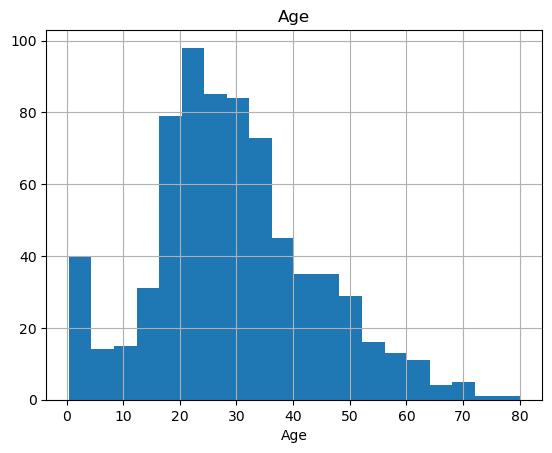

count    7.140000e+02
mean     2.388379e-16
std      1.000701e+00
min     -2.016979e+00
5%      -1.770360e+00
10%     -1.081480e+00
20%     -7.370406e-01
30%     -5.303766e-01
40%     -3.237127e-01
50%     -1.170488e-01
60%      1.447255e-01
70%      4.340550e-01
80%      7.784949e-01
90%      1.398487e+00
95%      1.811815e+00
99%      2.491739e+00
max      3.465126e+00
Name: Age_standart_scaler, dtype: float64


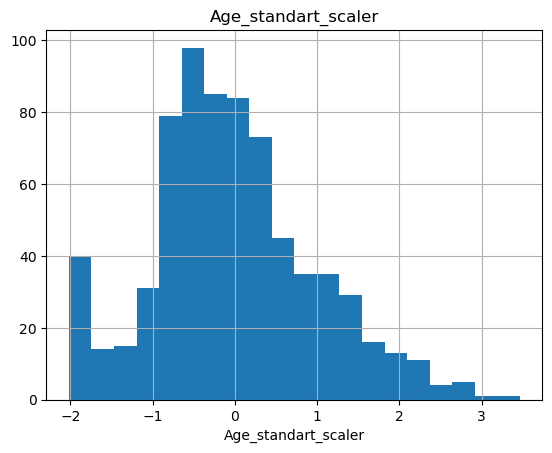

count    714.000000
mean       0.095056
std        0.812671
min       -1.542937
5%        -1.342657
10%       -0.783217
20%       -0.503497
30%       -0.335664
40%       -0.167832
50%        0.000000
60%        0.212587
70%        0.447552
80%        0.727273
90%        1.230769
95%        1.566434
99%        2.118601
max        2.909091
Name: Age_robust_scaler, dtype: float64


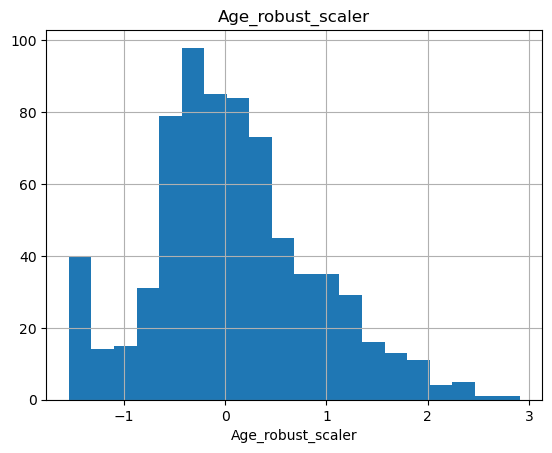

count    714.000000
mean       0.367921
std        0.182540
min        0.000000
5%         0.044986
10%        0.170646
20%        0.233476
30%        0.271174
40%        0.308872
50%        0.346569
60%        0.394320
70%        0.447097
80%        0.509927
90%        0.623021
95%        0.698417
99%        0.822443
max        1.000000
Name: Age_min_max_scaler, dtype: float64


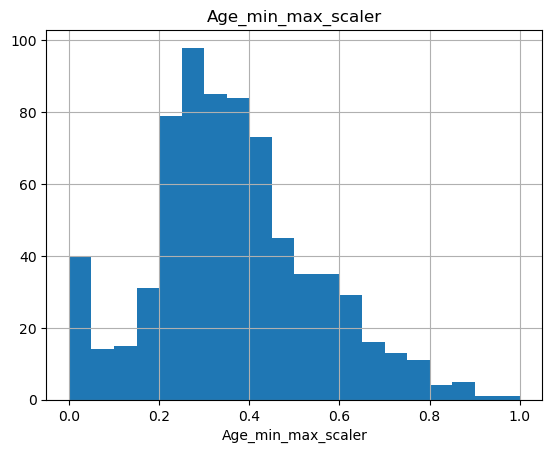

In [53]:
#yapmak istediğim ortaya çıkan değişkenlerin yeni değerlerinde bir değişiklik var mı bunu gözlemlemek
for col in age_cols:
    num_summary(df, col, plot = True)

ilk gösterdiği yaş değişkeninin ilk hali dağılımını inceliyorum. ikincisi standart scaler dağılımı aynı ancak değişkenin değerleri değişti üçüncüde de aynı şekilde dağılım aynı değerlerin ifade ediliş şekli değişti dördüncüye baktığımda da yine dağılım aynıdır. burada dikkat etmem gereken şey değişkenlere eşit yaklaşılmasını sağlamak demek onların yapısını bozmak demek değildir. yapılarını koruyacak şekilde ifade ediliş tarzlarının değiştirilmesidir.

* 4- numeric to categorical: sayısal değişkenleri kategorik değişkenlere çevirme işlemi

karşıma binning şeklinde de gelebilir. amacım veri setindeki sayısal değişkenleri kategorik değişkenlere çevirmektir.

In [55]:
# burada cut ya da qcut fonksiyonunu kullanabiliriz biz qcut kullanacağız.

df["Age_qcut"] = pd.qcut(df["Age"], 5) # qcut ile yaş değişkenini böl diyorum
# değişkeni verdikten sonra kaç parça olacağını söyledim ve eğer labellarım varsa bir de labellarımı giriyorum.benim labelım olmadığı için kullanmıyorum

In [56]:
df.head() #yaş değişkeni görüldüğü gibi çeyrek değerlere göre bölünmüş oldu
#dikkat: eğer dönüştürecek olduğum değişkeni hangi sınıflara dönüştürmek istediğimi biliyorsam bu durumda label argümanını kullanabilirim.
# qcut fonksiyonu bir değişkenin değerlerini küçükten büyüğe sıralar ve örneğin yaş değişenini  belirlediğim orana göre parçalar ve sınıflar böler.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standart_scaler,Age_robust_scaler,Age_min_max_scaler,Age_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377,-0.335664,0.271174,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831,0.559441,0.472229,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825,-0.111888,0.321438,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167,0.391608,0.434531,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167,0.391608,0.434531,"(31.8, 41.0]"
